In [194]:
import numpy as np
import pandas as pd
from os import path
import os
import scipy.stats as stats
import collections
import DataLoaderHistoric as DLH
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize'] = [16, 16]

Load the dataframes

In [195]:
path_processed = '/home/john/Documents/projects/fpl-analystics-prediction/Processed'

player_data = pd.read_csv(path.join(path_processed, 'model_database.csv'))
team_data = pd.read_csv(path.join(path_processed, 'team_stats.csv'))

player_data = player_data.drop(['season.1', 'round.1', 'team_id.1', 'season.2', 'season.3', 'round.2', 'round.3'], axis=1)

player_data = player_data.drop(['mean_assists_any_10',
                                 'median_assists_any_10',
                                 'mean_bonus_any_10',
                                 'median_bonus_any_10',
                                 'mean_bps_any_10',
                                 'median_bps_any_10',
                                 'mean_clean_sheets_any_10',
                                 'median_clean_sheets_any_10',
                                 'mean_creativity_any_10',
                                 'median_creativity_any_10',
                                 'mean_goals_conceded_any_10',
                                 'median_goals_conceded_any_10',
                                 'mean_goals_scored_any_10',
                                 'median_goals_scored_any_10',
                                 'mean_ict_index_any_10',
                                 'median_ict_index_any_10',
                                 'mean_influence_any_10',
                                 'median_influence_any_10',
                                 'mean_minutes_any_10',
                                 'median_minutes_any_10',
                                 'mean_own_goals_any_10',
                                 'median_own_goals_any_10',
                                 'mean_penalties_missed_any_10',
                                 'median_penalties_missed_any_10',
                                 'mean_penalties_saved_any_10',
                                 'median_penalties_saved_any_10',
                                 'mean_red_cards_any_10',
                                 'median_red_cards_any_10',
                                 'mean_saves_any_10',
                                 'median_saves_any_10',
                                 'mean_selected_any_10',
                                 'median_selected_any_10',
                                 'mean_threat_any_10',
                                 'median_threat_any_10',
                                 'mean_total_points_any_10',
                                 'median_total_points_any_10',
                                 'mean_transfers_balance_any_10',
                                 'median_transfers_balance_any_10',
                                 'mean_value_any_10',
                                 'median_value_any_10',
                                 'mean_yellow_cards_any_10',
                                 'median_yellow_cards_any_10'], axis=1)

In [200]:
player_data[(player_data['season']==2020) & (player_data['round']==22)]

unique_id  season                        name  assists  bonus  bps  \
90420      2621.0    2020                  Mesut_Özil        0      0    0   
90442      2622.0    2020   Sokratis_Papastathopoulos        0      0    0   
90464      2623.0    2020  David_Luiz Moreira Marinho        0      0   -5   
90486      2624.0    2020   Pierre-Emerick_Aubameyang        0      0    5   
90508      2625.0    2020               Cédric_Soares        0      0    8   
...           ...     ...                         ...      ...    ...  ...   
103381     3278.0    2020               Claudio_Gomes        0      0    0   
103382     3279.0    2020       Vontae_Daley-Campbell        0      0    0   
103383     3280.0    2020          Thakgalo_Leshabela        0      0    0   
103384     3281.0    2020               Thomas_McGill        0      0    0   
103385     3282.0    2020            Michal_Karbownik        0      0    0   

        clean_sheets  creativity  element  element_type  fixture  \
90420              0         0.0        1             3      215   
90442              0         0.0        2             2      215   
90464              0         0.3        3             2      215   
90486              0         0.3        4             3      215   
90508              0         4.7        5             2      215   
...              ...         ...      ...           ...      ...   
103381             0         0.0      659             3      210   
103382             0         0.0      660             2      211   
103383             0         0.0      661             3      211   
103384             0         0.0      662             1      216   
103385             0         0.0      663             2      216   

        goals_conceded  goals_scored  ict_index  influence  minutes  \
90420                0             0        0.0        0.0        0   
90442                0             0        0.0        0.0        0   
90464                2             0        0.0        0.0       47   
90486                0             0        2.1        3.0       29   
90508                2             0        2.6       11.0       90   
...                ...           ...        ...        ...      ...   
103381               0             0        0.0        0.0        0   
103382               0             0        0.0        0.0        0   
103383               0             0        0.0        0.0        0   
103384               0             0        0.0        0.0        0   
103385               0             0        0.0        0.0        0   

        own_goals  penalties_missed  penalties_saved  red_cards  round  saves  \
90420           0                 0                0          0     22      0   
90442           0                 0                0          0     22      0   
90464           0                 0                0          1     22      0   
90486           0                 0                0          0     22      0   
90508           0                 0                0          0     22      0   
...           ...               ...              ...        ...    ...    ...   
103381          0                 0                0          0     22      0   
103382          0                 0                0          0     22      0   
103383          0                 0                0          0     22      0   
103384          0                 0                0          0     22      0   
103385          0                 0                0          0     22      0   

        selected  team_a_score  team_h_score  threat  total_points  \
90420      42434           1.0           2.0     0.0             0   
90442       4773           1.0           2.0     0.0             0   
90464      65560           1.0           2.0     2.0            -3   
90486     517358           1.0           2.0    18.0             1   
90508      25009           1.0           2.0    10.0             1   
...     

In [197]:
print(list(player_data.columns))

['unique_id', 'season', 'name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element', 'element_type', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves', 'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards', 'position', 'team_points', 'team_wins', 'team_draws', 'team_losses', 'team_goals_for', 'team_goals_against', 'team_goals_diff', 'team_yc', 'team_rc', 'team_position', 'next_fixture_position', 'next_fixture_points', 'next_fixture_wins', 'next_fixture_draws', 'next_fixture_losses', 'next_fixture_goals_for', 'next_fixture_goals_against', 'next_fixture_goals_diff', 'next_fixture_yc', 'next_fixture_rc', 'total_assists_any_all', 'total_bonus_any_all', 'total_bps_any_all', 'total_clean_sheets_any_all', 'total_creativity_any_all', 'total_goals_conceded_any_all

In [198]:
team_data.head(n=100)

team_name  team_id  season  team_unique_id  round  position  \
0          Burnley        3    2016               3      1        18   
1          Swansea       16    2016              16      1         6   
2   Crystal Palace        5    2016               5      1        19   
3        West Brom       19    2016              19      1         7   
4          Everton        6    2016               6      1         8   
5            Spurs       17    2016              17      1        12   
6        Hull City        7    2016               7      1         4   
7        Leicester        8    2016               8      1        15   
8         Man City       10    2016              10      1         5   
9       Sunderland       15    2016              15      1        16   
10   Middlesbrough       12    2016              12      1         9   
11      Stoke City       14    2016              14      1        11   
12     Southampton       13    2016              13      1        10   
13         Watford       18    2016              18      1        13   
14         Arsenal        1    2016               1      1        14   
15       Liverpool        9    2016               9      1         2   
16     Bournemouth        2    2016               2      1        20   
17         Man Utd       11    2016              11      1         1   
18         Chelsea        4    2016               4      1         3   
19        West Ham       20    2016              20      1        17   
20         Burnley        3    2016               3      2         8   
21         Swansea       16    2016              16      2        12   
22  Crystal Palace        5    2016               5      2        19   
23       West Brom       19    2016              19      2         9   
24         Everton        6    2016               6      2         5   
25           Spurs       17    2016              17      2         7   
26       Hull City        7    2016               7      2         3   
27       Leicester        8    2016               8      2        15   
28        Man City       10    2016              10      2         1   
29      Sunderland       15    2016              15      2        18   
30   Middlesbrough       12    2016              12      2         6   
31      Stoke City       14    2016              14      2        17   
32     Southampton       13    2016              13      2        16   
33         Watford       18    2016              18      2        14   
34         Arsenal        1    2016               1      2        13   
35       Liverpool        9    2016               9      2        11   
36     Bournemouth        2    2016               2      2        20   
37         Man Utd       11    2016              11      2         2   
38         Chelsea        4    2016               4      2         4   
39        West Ham       20    2016              20      2        10   
40         Burnley        3    2016               3      3        13   
41         Swansea       16    2016              16      3        14   
42  Crystal Palace        5    2016               5      3        17   
43       West Brom       19    2016              19      3        10   
44         Everton        6    2016               6      3         4   
45           Spurs       17    2016              17      3         7   
46       Hull City        7    2016               7      3         5   
47       Leicester        8    2016               8      3         9   
48        Man City       10    2016              10      3         1   
49      Sunderland       15    2016              15      3        16   
50   Middlesbrough       12    2016              12      3         6   
51      Stoke City       14    2016              14      3        20   
52     Southampton       13    2016              13      3        15   
53         Watford       18    2016              18      3        18   
54         Arsenal        1    2016              

Break the player data down into separate dataframes for each element

In [173]:
player_data_goalkeeper = player_data[player_data['element_type']==1]
player_data_defender = player_data[player_data['element_type']==2]
player_data_midfielder = player_data[player_data['element_type']==3]
player_data_striker = player_data[player_data['element_type']==4]

In [174]:
def select_top_players(data, n=25):
    
    data_max_round = []
    
    unique_ids = data['unique_id'].unique()
    
    for unique_id in unique_ids:
        data_temp = data[data['unique_id']==unique_id]
        data_temp = data_temp[data_temp['round']==data_temp['round'].max()]
        data_max_round.append(data_temp)
    
    data_max_round = pd.concat(data_max_round, axis=0).reset_index(drop=True)
    data_max_round['total_points_sort'] = data_max_round['total_points'] + data_max_round['total_points']
    data_max_round = data_max_round.sort_values(['total_points_sort']).reset_index(drop=True).iloc[:n, :]
    
    unique_ids = data_max_round['unique_id'].unique()
    
    return data[data['unique_id'].isin(unique_ids)]
    
    

Visualise correlation matrix for all data

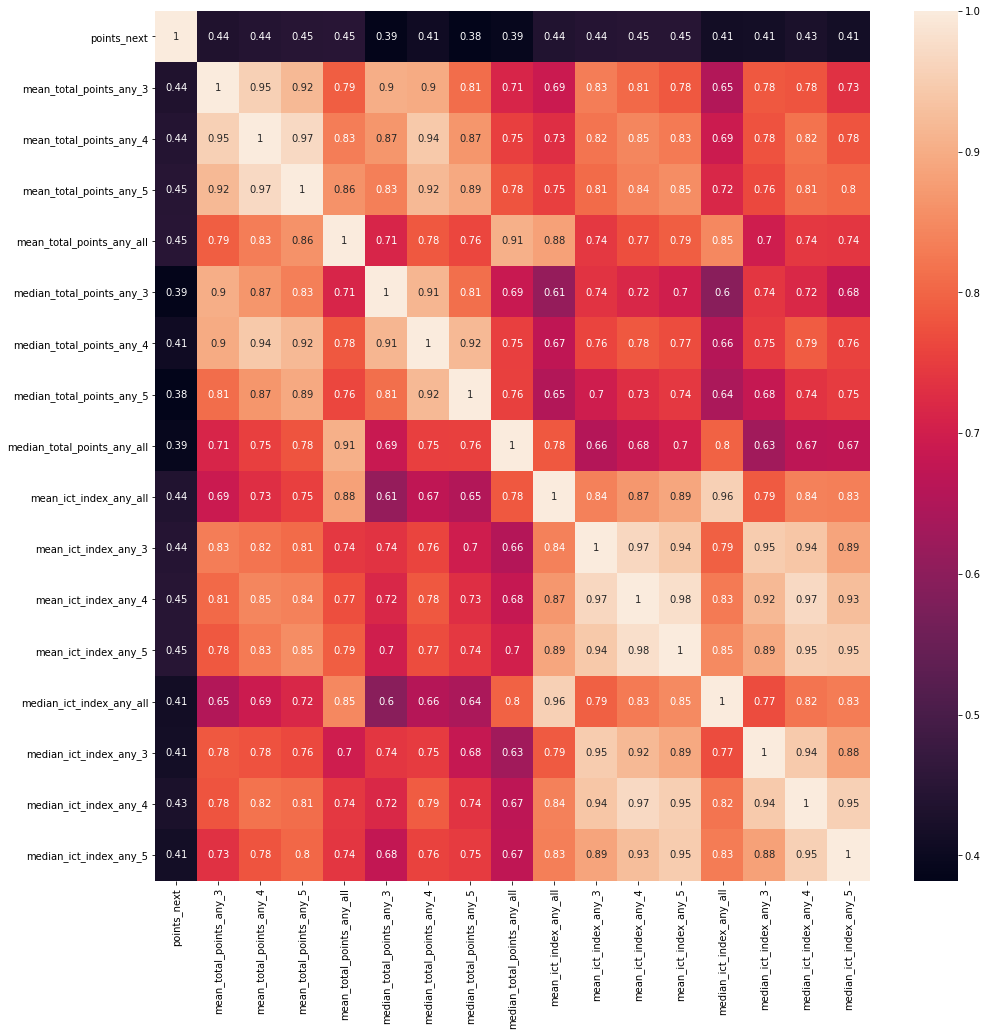

In [175]:
team_data_sub = player_data[['points_next', 
                            'mean_total_points_any_3',
                            'mean_total_points_any_4',
                            'mean_total_points_any_5',
                            'mean_total_points_any_all',
                            'median_total_points_any_3',
                            'median_total_points_any_4',
                            'median_total_points_any_5',
                            'median_total_points_any_all',
                            'mean_ict_index_any_all',
                            'mean_ict_index_any_3',
                            'mean_ict_index_any_4',
                            'mean_ict_index_any_5',
                            'median_ict_index_any_all',
                            'median_ict_index_any_3',
                            'median_ict_index_any_4',
                            'median_ict_index_any_5']]

team_data_corr = team_data_sub.corr()
sns.heatmap(team_data_corr, annot=True)
plt.show()

Goalkeepers

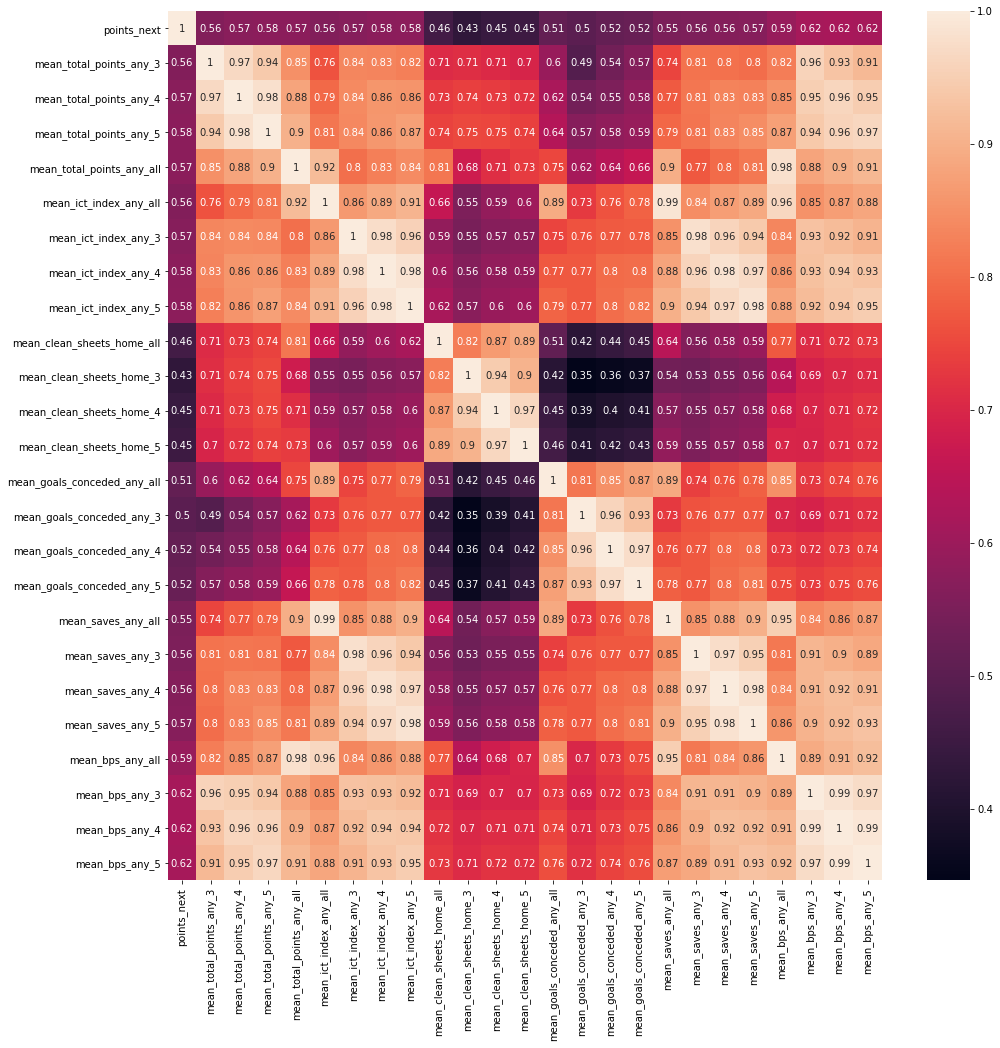

In [176]:
team_data_sub = player_data_goalkeeper[['points_next', 
                            'mean_total_points_any_3',
                            'mean_total_points_any_4',
                            'mean_total_points_any_5',
                            'mean_total_points_any_all',
                            'mean_ict_index_any_all',
                            'mean_ict_index_any_3',
                            'mean_ict_index_any_4',
                            'mean_ict_index_any_5',
                            'mean_clean_sheets_home_all',
                            'mean_clean_sheets_home_3',
                            'mean_clean_sheets_home_4',
                            'mean_clean_sheets_home_5',
                            'mean_goals_conceded_any_all',
                            'mean_goals_conceded_any_3',
                            'mean_goals_conceded_any_4',
                            'mean_goals_conceded_any_5',
                            'mean_saves_any_all',
                            'mean_saves_any_3',
                            'mean_saves_any_4',
                            'mean_saves_any_5',
                            'mean_bps_any_all',
                            'mean_bps_any_3',
                            'mean_bps_any_4',
                            'mean_bps_any_5']]

team_data_corr = team_data_sub.corr()
sns.heatmap(team_data_corr, annot=True)
plt.show()

Defenders

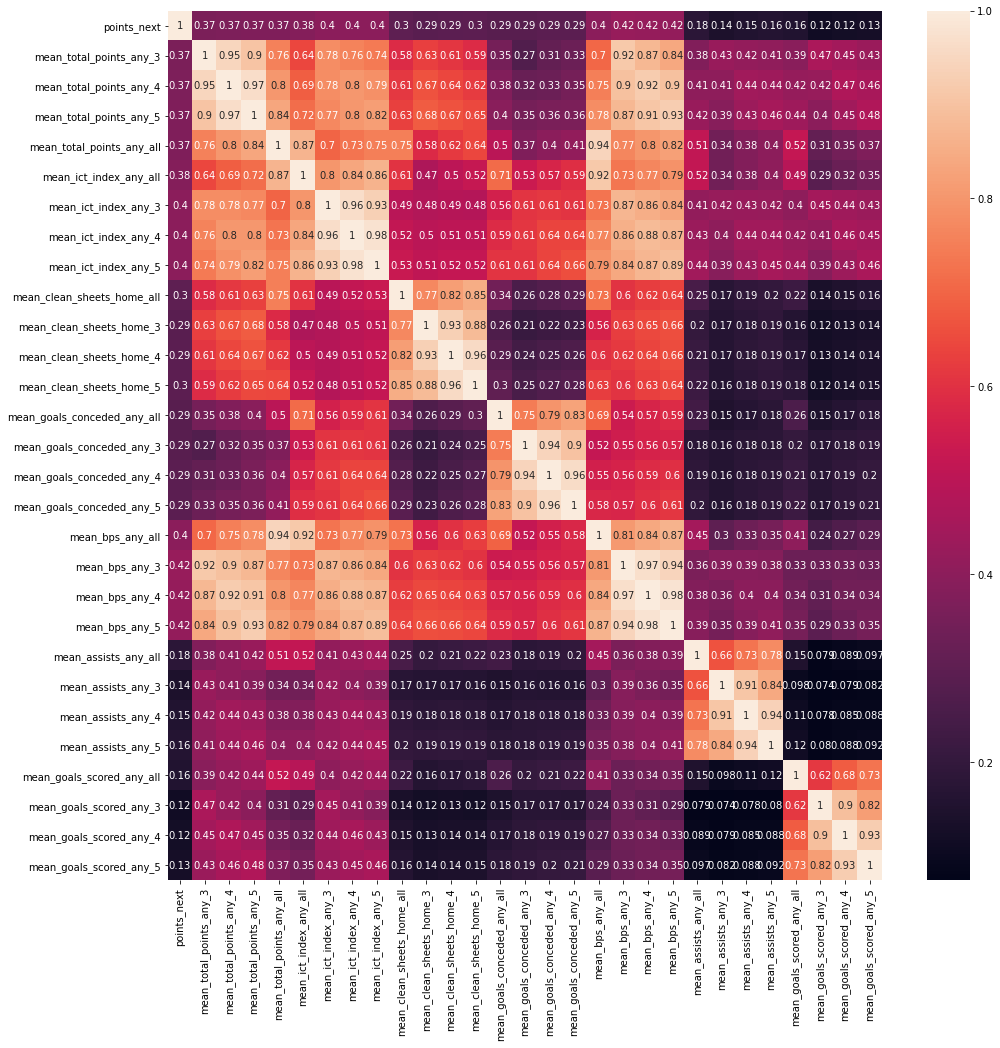

In [177]:
team_data_sub = player_data_defender[['points_next', 
                            'mean_total_points_any_3',
                            'mean_total_points_any_4',
                            'mean_total_points_any_5',
                            'mean_total_points_any_all',
                            'mean_ict_index_any_all',
                            'mean_ict_index_any_3',
                            'mean_ict_index_any_4',
                            'mean_ict_index_any_5',
                            'mean_clean_sheets_home_all',
                            'mean_clean_sheets_home_3',
                            'mean_clean_sheets_home_4',
                            'mean_clean_sheets_home_5',
                            'mean_goals_conceded_any_all',
                            'mean_goals_conceded_any_3',
                            'mean_goals_conceded_any_4',
                            'mean_goals_conceded_any_5',
                            'mean_bps_any_all',
                            'mean_bps_any_3',
                            'mean_bps_any_4',
                            'mean_bps_any_5',
                            'mean_assists_any_all',
                            'mean_assists_any_3',
                            'mean_assists_any_4',
                            'mean_assists_any_5',
                            'mean_goals_scored_any_all',
                            'mean_goals_scored_any_3',
                            'mean_goals_scored_any_4',
                            'mean_goals_scored_any_5']]

team_data_corr = team_data_sub.corr()
sns.heatmap(team_data_corr, annot=True)
plt.show()

Midfielders

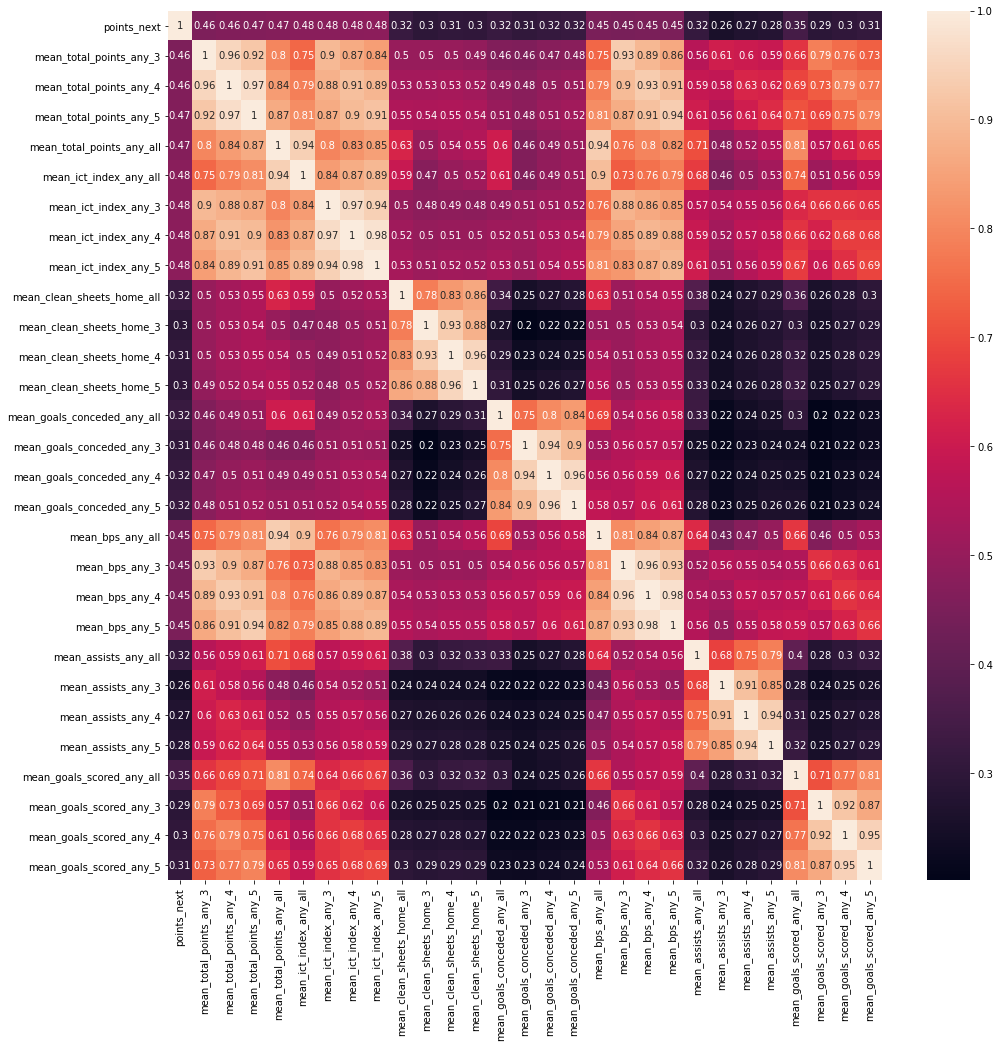

In [178]:
team_data_sub = player_data_midfielder[['points_next', 
                            'mean_total_points_any_3',
                            'mean_total_points_any_4',
                            'mean_total_points_any_5',
                            'mean_total_points_any_all',
                            'mean_ict_index_any_all',
                            'mean_ict_index_any_3',
                            'mean_ict_index_any_4',
                            'mean_ict_index_any_5',
                            'mean_clean_sheets_home_all',
                            'mean_clean_sheets_home_3',
                            'mean_clean_sheets_home_4',
                            'mean_clean_sheets_home_5',
                            'mean_goals_conceded_any_all',
                            'mean_goals_conceded_any_3',
                            'mean_goals_conceded_any_4',
                            'mean_goals_conceded_any_5',
                            'mean_bps_any_all',
                            'mean_bps_any_3',
                            'mean_bps_any_4',
                            'mean_bps_any_5',
                            'mean_assists_any_all',
                            'mean_assists_any_3',
                            'mean_assists_any_4',
                            'mean_assists_any_5',
                            'mean_goals_scored_any_all',
                            'mean_goals_scored_any_3',
                            'mean_goals_scored_any_4',
                            'mean_goals_scored_any_5']]

team_data_corr = team_data_sub.corr()
sns.heatmap(team_data_corr, annot=True)
plt.show()

Strikers

In [179]:
player_data_striker_filt = select_top_players(player_data_striker, n=50)

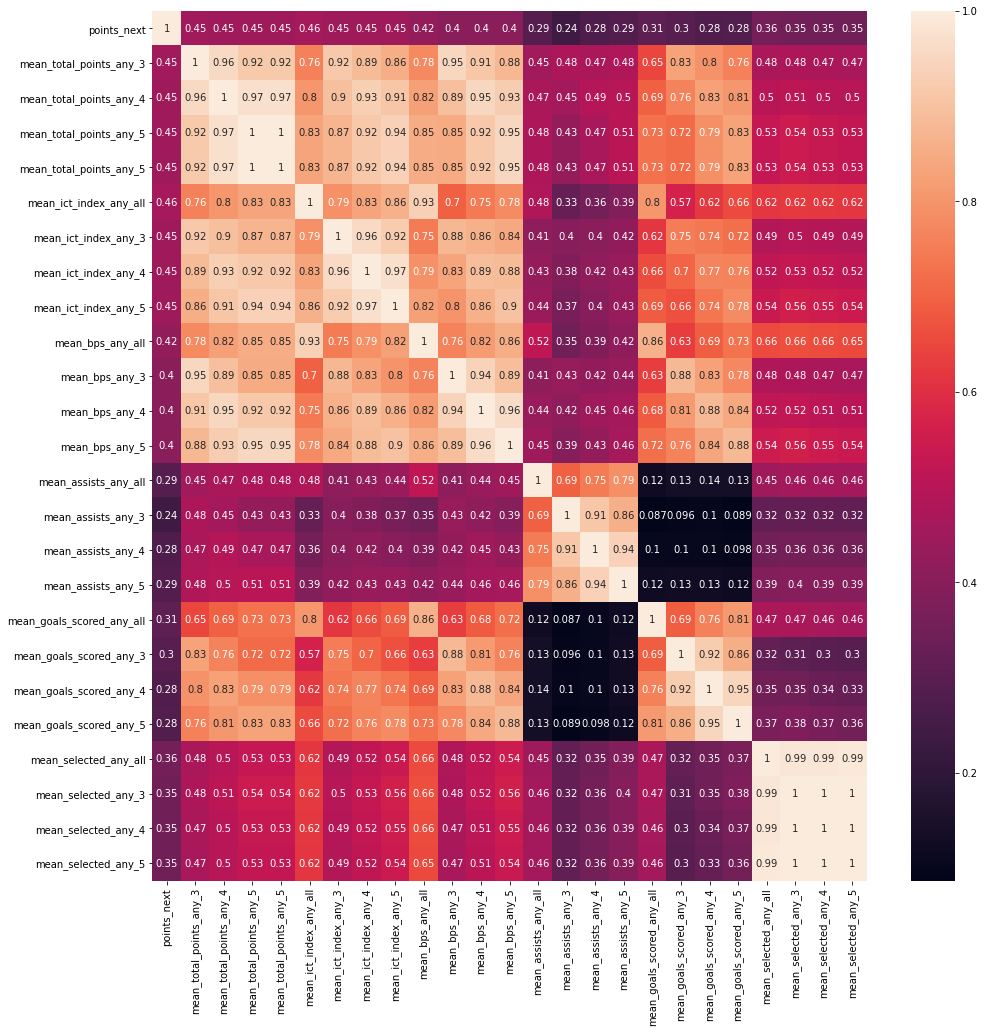

In [180]:
team_data_sub = player_data_striker_filt[['points_next', 
                            'mean_total_points_any_3',
                            'mean_total_points_any_4',
                            'mean_total_points_any_5',
                            'mean_total_points_any_5',
                            'mean_ict_index_any_all',
                            'mean_ict_index_any_3',
                            'mean_ict_index_any_4',
                            'mean_ict_index_any_5',
                            'mean_bps_any_all',
                            'mean_bps_any_3',
                            'mean_bps_any_4',
                            'mean_bps_any_5',
                            'mean_assists_any_all',
                            'mean_assists_any_3',
                            'mean_assists_any_4',
                            'mean_assists_any_5',
                            'mean_goals_scored_any_all',
                            'mean_goals_scored_any_3',
                            'mean_goals_scored_any_4',
                            'mean_goals_scored_any_5',
                            'mean_selected_any_all',
                            'mean_selected_any_3',
                            'mean_selected_any_4',
                            'mean_selected_any_5']]

team_data_corr = team_data_sub.corr()
sns.heatmap(team_data_corr, annot=True)
plt.show()

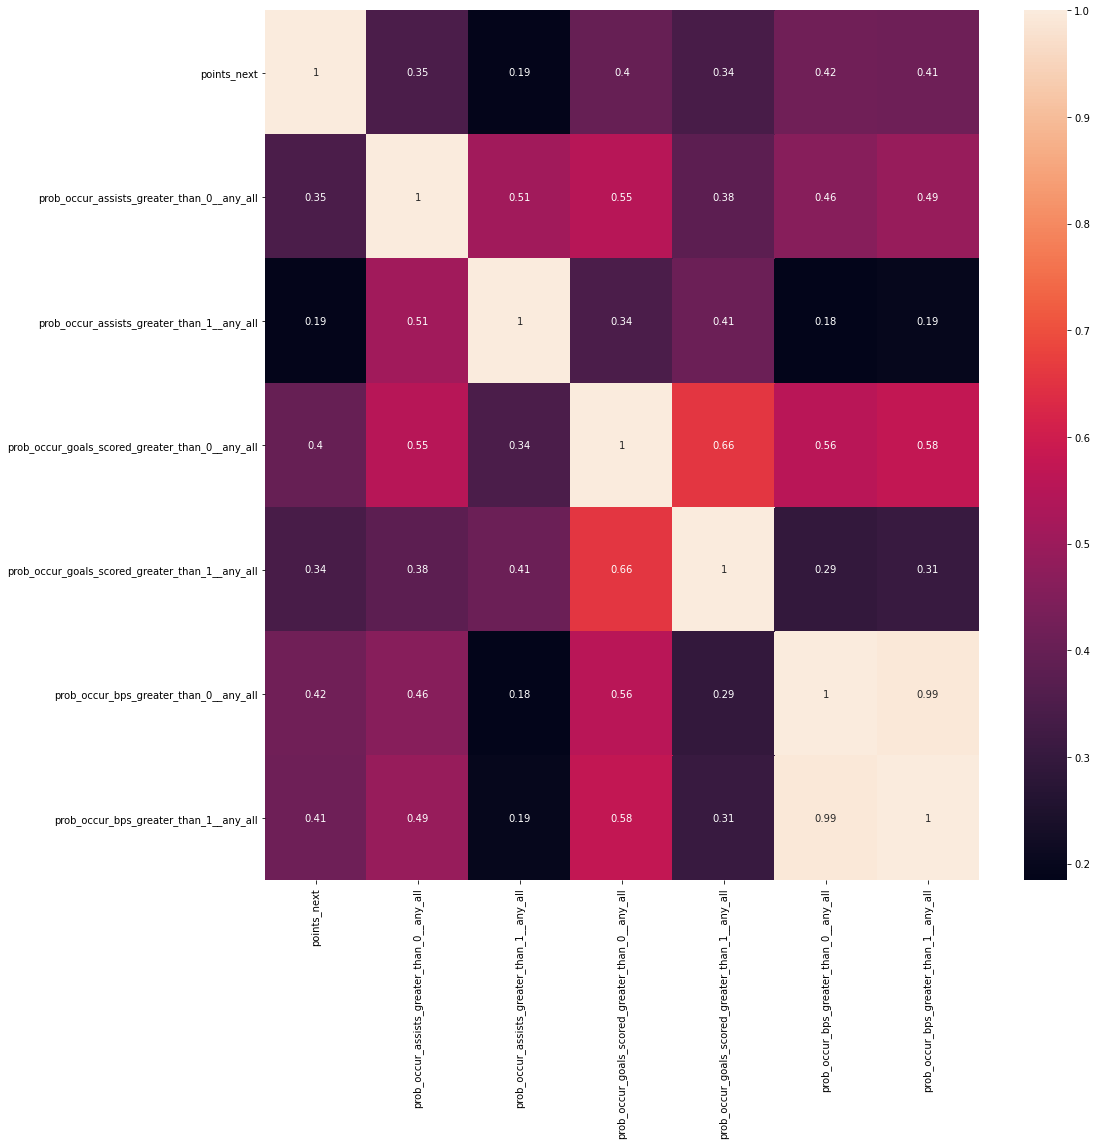

In [181]:
team_data_sub = player_data_striker_filt[['points_next', 
                                    'prob_occur_assists_greater_than_0__any_all',
                                    'prob_occur_assists_greater_than_1__any_all',
                                    'prob_occur_goals_scored_greater_than_0__any_all',
                                    'prob_occur_goals_scored_greater_than_1__any_all',
                                    'prob_occur_bps_greater_than_0__any_all',
                                    'prob_occur_bps_greater_than_1__any_all',
                                    ]]

team_data_corr = team_data_sub.corr()
sns.heatmap(team_data_corr, annot=True)
plt.show()

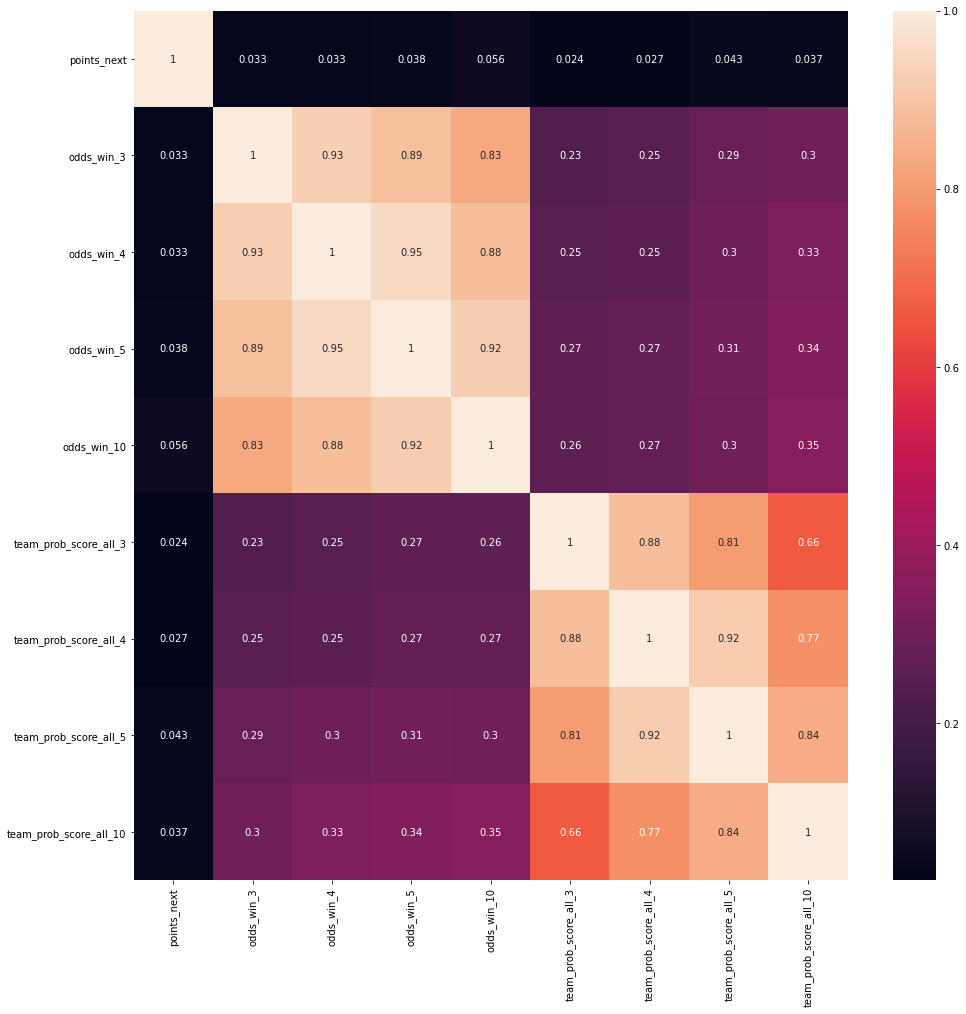

In [182]:
team_data_sub = player_data_striker_filt[['points_next', 
                                    'odds_win_3',
                                    'odds_win_4',
                                    'odds_win_5',
                                    'odds_win_10',
                                    'team_prob_score_all_3',
                                    'team_prob_score_all_4',
                                    'team_prob_score_all_5',
                                    'team_prob_score_all_10']]

team_data_corr = team_data_sub.corr()
sns.heatmap(team_data_corr, annot=True)
plt.show()

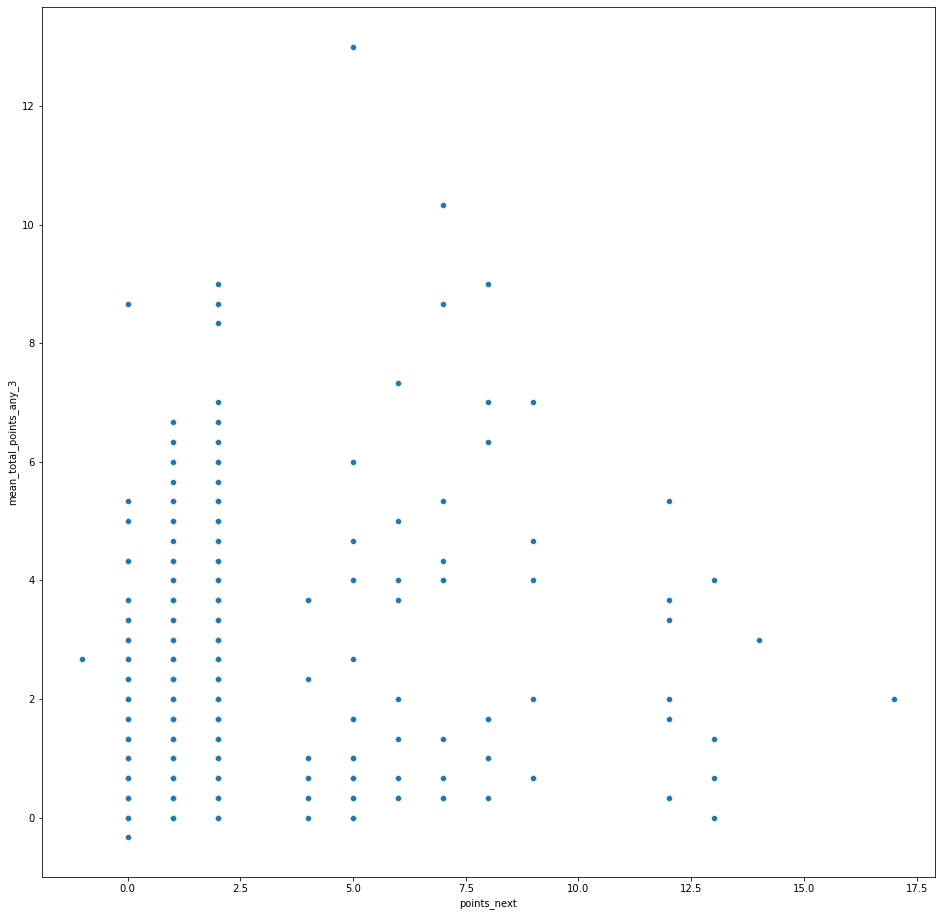

In [183]:
sns.scatterplot(x='points_next', y='mean_total_points_any_3', data=player_data_striker_filt)
plt.show()

        win  odds_win_10  odds_win_10_thresh
0       1.0     0.333333            0.333333
1       0.0     0.000000            0.000000
2       0.0     0.500000            0.500000
3       0.0     0.250000            0.250000
4       0.0     0.750000            0.750000
...     ...          ...                 ...
103381  NaN          NaN                 NaN
103382  NaN          NaN                 NaN
103383  NaN          NaN                 NaN
103384  NaN          NaN                 NaN
103385  NaN          NaN                 NaN

[103386 rows x 3 columns]


<ipython-input-192-73af5a1b9943>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data_sub['odds_win_10_thresh'] = player_data['odds_win_10']
/home/john/anaconda3/envs/data_science/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/john/anaconda3/envs/data_science/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

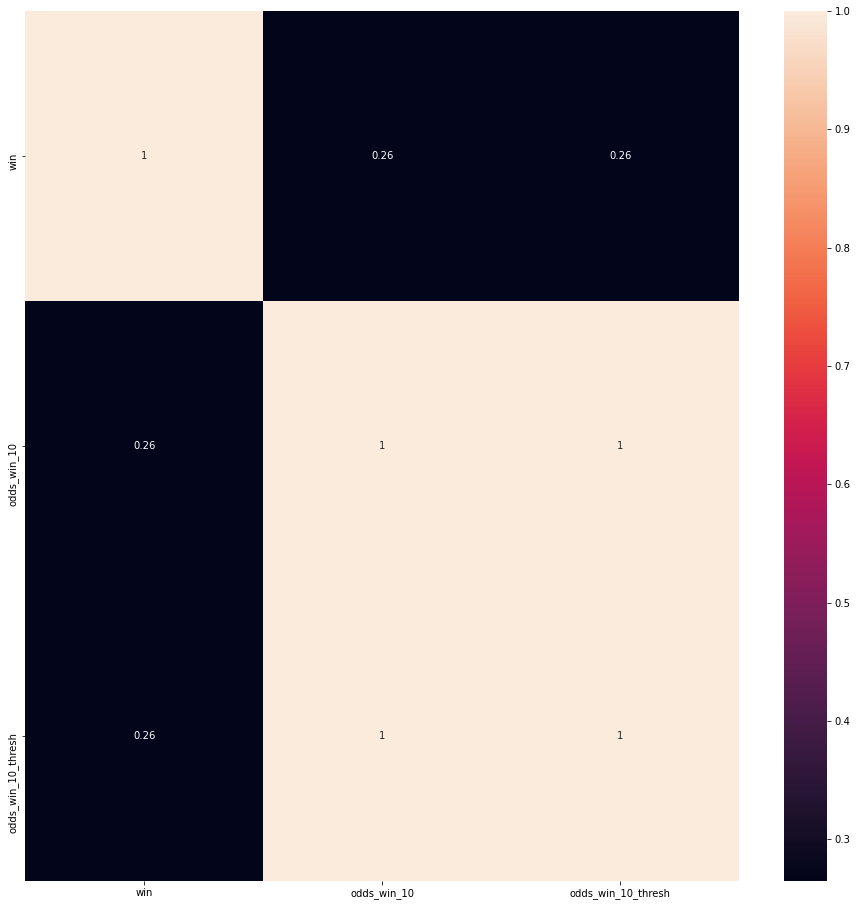

In [192]:
# print(team_data['win'].unique())

team_data_sub = player_data[['win', 
                            'odds_win_10']]

team_data_sub['odds_win_10_thresh'] = player_data['odds_win_10']

team_data_sub[team_data_sub['odds_win_10'] > 0.5].loc['odds_win_10_thresh'] = 1
team_data_sub[team_data_sub['odds_win_10'] <= 0.5].loc['odds_win_10_thresh'] = 0

print(team_data_sub)

team_data_corr = team_data_sub.corr()
sns.heatmap(team_data_corr, annot=True)
plt.show()

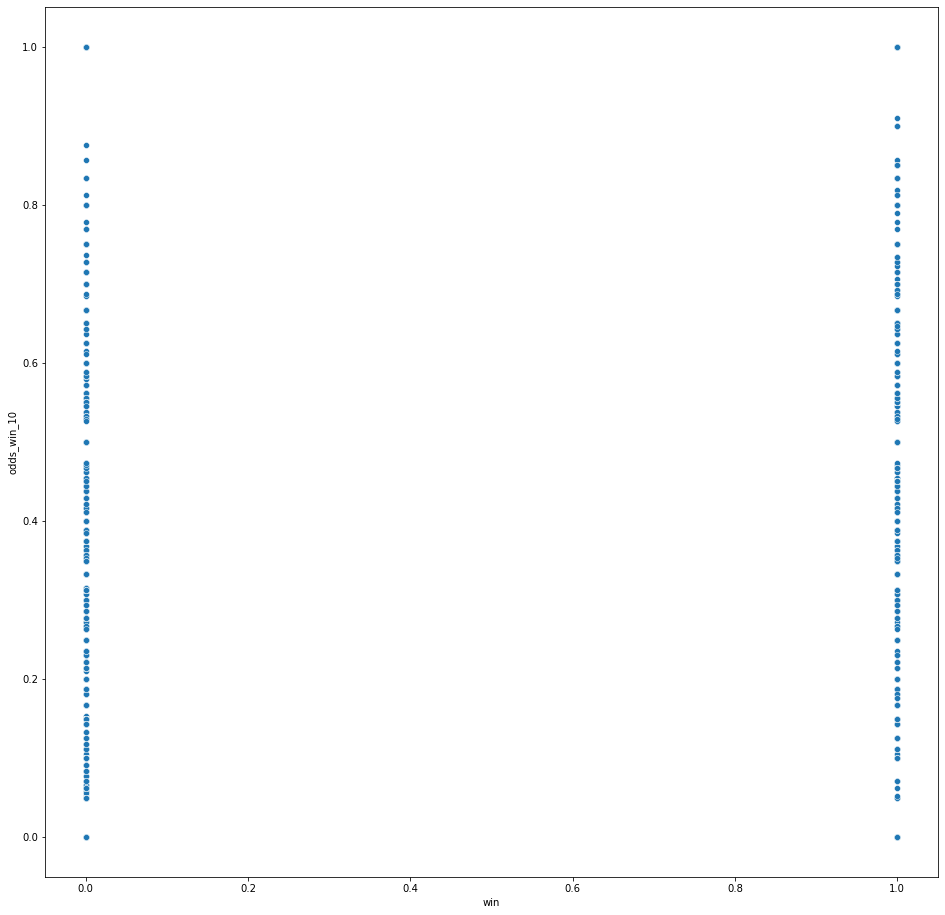

In [185]:
sns.scatterplot(x='win', y='odds_win_10', data=team_data)
plt.show()

Calculate the pearsons correlation coefficient

In [186]:
list(player_data_striker_filt.loc[:, player_data_striker_filt.isna().any()].columns)

[]

In [187]:
columns = player_data_striker_filt.columns
target_column = 'points_next'

final_columns = []
final_corr = []

for column in columns:
    if player_data_striker_filt[column].dtype != 'object':
        final_columns.append(column)
        final_corr.append(pearsonr(player_data_striker_filt[target_column], player_data_striker_filt[column])[0])


/home/john/anaconda3/envs/data_science/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [188]:
data_corr_dict = {'labels': final_columns, 'correlation_coeff': final_corr}

data_corr = pd.DataFrame(data_corr_dict)
data_corr['correlation_coeff'] = data_corr['correlation_coeff'].abs()
data_corr = data_corr.sort_values(by='correlation_coeff', ascending=False)

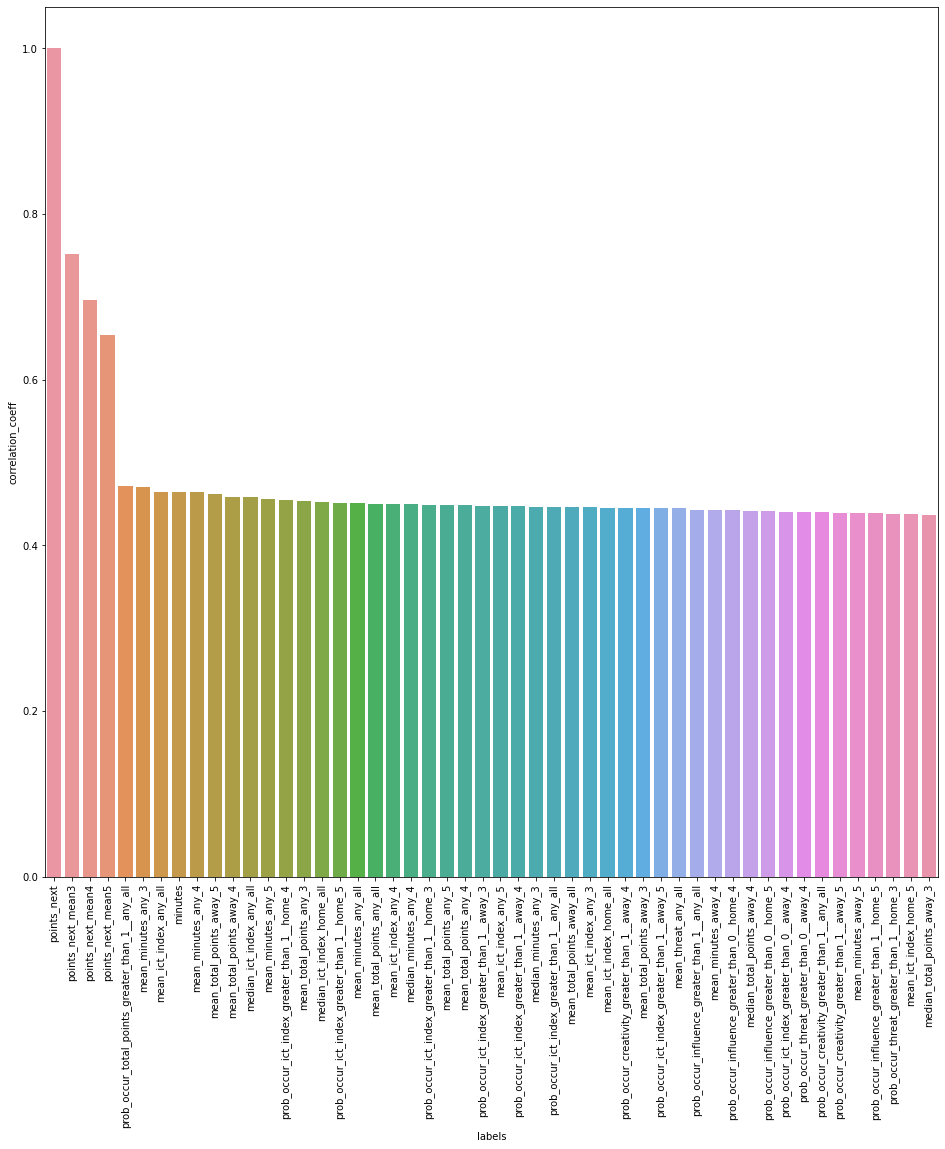

In [189]:
data_corr_cut = data_corr.iloc[:50, :]

ax = sns.barplot(x="labels", y="correlation_coeff", data=data_corr_cut)
plt.xticks(rotation=90)
plt.show()

In [131]:
plt.plot(data_filt['mean_ict_index_any_5'].values, data_filt[target_column].values, '.')
plt.show()

NameError: name 'data_filt' is not defined